<a href="https://www.kaggle.com/code/benlittell/error-outliers?scriptVersionId=112377603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import math
import statistics as stats

x = [1.0,2.0,4.0,6.0,5.0,6.0,9.0,8.0,11.0,12.0]
y = [14.0,10.0,12.0,9.0,8.0,6.0,4.0,3.0,3.0,10.0]


def corcoeff(xd, yd):
    sigma1 = sigma_xy(xd, yd) * len(xd)
    sigma2 = sum(xd)*sum(yd)
    sigma3 = len(xd) * sum([val**2 for val in xd])
    sigma4 = sum(xd)**2
    sigma5 = len(yd) * sum([val**2 for val in yd])
    sigma6 = sum(yd)**2
    top = (sigma1 - sigma2)
    bottom = (math.sqrt(sigma3-sigma4))*(math.sqrt(sigma5-sigma6))
    return top/bottom
    

def sigma_xy(xd, yd):
    nlist = []
    for i in range(len(xd)):
        nlist.append((xd[i]*yd[i]))
    return sum(nlist)

def least_sqrs(xd, yd):
    matrix1 = [[sum(val**2 for val in xd), sum(xd)], [sum(xd), len(xd)]]
    matrix2 = [sigma_xy(xd, yd), sum(yd)]
    array1 = np.array(matrix1)
    array2 = np.array(matrix2)
    invarray1 = np.linalg.inv(array1)
    solution = np.dot(invarray1, array2)
    return solution

def scatter_plot(data1, data2, slope, y_int):
    y_vals = []
    x_data = [min(data1), max(data1)]
    for val in range(2):
        ans = (slope * x_data[val]) + y_int
        y_vals.append(ans)
    plt.plot(x_data, y_vals, '-r')
    plt.scatter(data1, data2)
    plt.title('SCATTER PLOT')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.text(x_data[1], y_vals[1], f'Y={round(slope)}*X+{round(y_int)}', color='g')
    plt.show()


[-0.68074324 12.25675676]
-0.6474248537226269


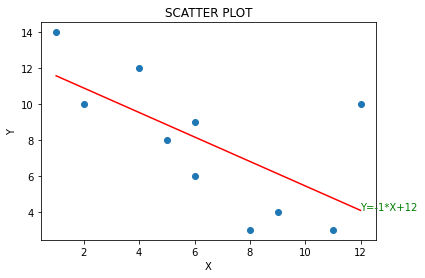

In [3]:
coeff = corcoeff(x, y)
data2 = least_sqrs(x, y)
print(data2)
print(coeff)
scatter_plot(x, y, data2[0], data2[1])

In [4]:
def residuals(xd, yd, n=2):
    mb = least_sqrs(xd, yd)
    ys = [val*mb[0]+mb[1] for val in xd]
    r = [yd[n]-ys[n] for n in range(len(yd))]
    mr = stats.mean(r)
    stdr = stats.stdev(r)
    return r, mr, stdr

    
res, rm, rstd = residuals(x, y)

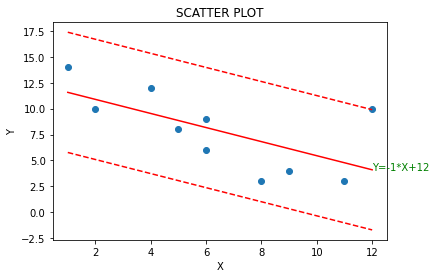

In [5]:
def scatter_plot_er(data1, data2, slope, y_int, std, n=2):
    y_vals = []
    e1 = []
    e2 = []
    x_data = [min(data1), max(data1)]
    for val in range(2):
        ans = (slope * x_data[val]) + y_int
        y_vals.append(ans)
    for val in range(2):
        ans = (slope * x_data[val]) + y_int +(n*std)
        e1.append(ans)
    for val in range(2):
        ans = (slope * x_data[val]) + y_int -(n*std)
        e2.append(ans)
    plt.plot(x_data, y_vals, '-r')
    plt.plot(x_data, e1, '--r')
    plt.plot(x_data, e2, '--r')
    plt.scatter(data1, data2)
    plt.title('SCATTER PLOT')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.text(x_data[1], y_vals[1], f'Y={round(slope)}*X+{round(y_int)}', color='g')
    plt.show()
    
    
scatter_plot_er(x, y, data2[0], data2[1], rstd)